In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Hello World Classification: Boston Housing prediction
# recode the target variable

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##################################
# Load dataset
filename = '/content/drive/My Drive/Data Science with Python Spring 2020/BostonHousing(1).csv'
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename)
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
####################################
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
# make a new target variable called 'class'
import numpy as np
dataset['class'] = (dataset['medv'] > np.mean(dataset['medv'])) * 1
print(dataset.groupby('class').size())

(506, 14)
       crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  ...  311     15

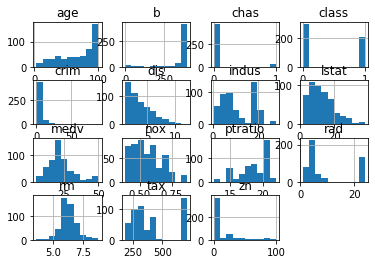

In [ ]:
#######################################
# Data visualizations

# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(dataset.shape[1],dataset.shape[1]), sharex=False, sharey=False)
#pyplot.show()
# histograms - alphabetical!
dataset.hist()
pyplot.show()
# scatter plot matrix
#scatter_matrix(dataset)
# pyplot.show()


In [ ]:
dataset.shape

(506, 15)

In [ ]:
############################################
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,14]
print(X.shape, Y.shape)

(506, 13) (506,)


In [ ]:
# of course, you could min/max features and add other polynomials!

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
####################################################
# Spot-Check Algorithms


models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
##################################################
# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.891159 (0.029554)
LDA: 0.876098 (0.029920)
KNN: 0.809329 (0.050787)
CART: 0.841280 (0.050742)
NB: 0.745122 (0.040855)
SVM: 0.737866 (0.050478)


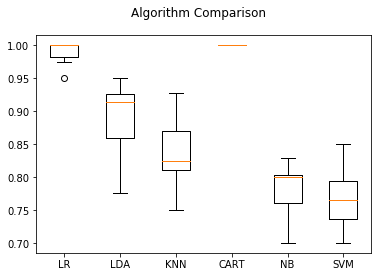

In [ ]:
#####################################
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
############################################
# Make predictions on validation dataset
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8235294117647058
[[50  6]
 [12 34]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        56
         1.0       0.85      0.74      0.79        46

    accuracy                           0.82       102
   macro avg       0.83      0.82      0.82       102
weighted avg       0.83      0.82      0.82       102



In [ ]:
########################################
# you could also code it like in Week 4!

def perf_measure(y_actual, y_pred):
  TP = 0
  FP = 0
  TN = 0
  FN = 0

  for i in range(len(y_pred)):
    if y_actual[i]==y_pred[i]==1:
      TP += 1
    if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
      FP += 1
    if y_actual[i]==y_pred[i]==0:
      TN += 1
    if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
      FN += 1
  tpr = TP/(TP+FN)
  tnr = TN/(TN+FP)
  fnr = 1-tpr
  fpr = 1-tnr
  print('TP:',TP,' FP:', FP,' TN:', TN,' FN:', FN)
  print('TPR:', round(tpr,2), ' TNR:', round(tnr,2), ' FNR:', round(fnr,2),' FPR:',round(fpr,2) )

In [ ]:
# VOILA!
perf_measure(Y_validation,
             predictions)

TP: 45  FP: 0  TN: 56  FN: 1
TPR: 0.98  TNR: 1.0  FNR: 0.02  FPR: 0.0
